# Data Exploration
## 1. Load the data
1. We load the data from different dataset files for investigation. 
2. We load the data using pandas dataframe. 
3. We set the datatypes of all the fields to object such that pandas avoid datatype checking for fast loading.

In [1]:
import pandas as pd
import os.path
file_template = "./data/orig/{0}/data.tsv"
data_files = ["title.akas.tsv","title.basics.tsv","title.crew.tsv","title.episode.tsv","title.principals.tsv","title.ratings.tsv",
              "name.basics.tsv"]

### 1.1. Look at title.akas.tsv

1. \N most frequent value for **language**, **types** and **attributes** columns
2. By grouping the data by **titleId**, we can get the count of different versions of movies
3. The high frequency/count of movie versions might indicate that a movie is a very popular movie and thus, is useful for movie prediction
4. We only retain **titleId** and **count_movie_versions** for our feature engineering later

In [7]:
import pandas as pd
import os.path

file_path = os.path.abspath(file_template.format(data_files[0]))

df_title_akas = pd.read_csv(file_path,sep="\t",quoting=3,dtype={"titleId":object,"ordering":object,"title":object,"region":object,
                                                              "language":object,"types":object,"attributes":object,"isOriginalTitle":object})
df_title_akas.describe()

,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
count,3772562,3772562,3772562,3772505,3772562,3772562,3772562,3772562
unique,2104393,197,2480238,245,95,16,189,3
top,tt8185052,1,Episode #1.1,US,\N,\N,\N,0
freq,197,2104393,2592,951775,3487279,2716661,3597019,3373342


In [8]:
df_title_akas.head(5)

,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
0,tt0000001,1,Carmencita - spanyol tánc,HU,\N,imdbDisplay,\N,0
1,tt0000001,2,Καρμενσίτα,GR,\N,\N,\N,0
2,tt0000001,3,Карменсита,RU,\N,\N,\N,0
3,tt0000001,4,Carmencita,US,\N,\N,\N,0
4,tt0000001,5,Carmencita,\N,\N,original,\N,1


In [9]:
# get the count of ordering by movie_title
df_title_akas = df_title_akas.groupby('titleId', as_index=False)['ordering'].count()
# rename ordering to count_movie_versions
column_renames = {'titleId': 'titleId', 'ordering': 'count_movie_versions'}
df_title_akas.rename(columns=column_renames, inplace=True)
print("# of rows:{0}".format(df_title_akas['titleId'].count()))
df_title_akas.head(5)

# of rows:2104393


,titleId,count_movie_versions
0,tt0000001,5
1,tt0000002,6
2,tt0000003,6
3,tt0000004,6
4,tt0000005,9


### 1.2. Look at title.basics.tsv

1. \N is most frequent value for **startYear**, **endYear**, **runtimeMinutes** columns
2. **titleType**, **isAdult**, **runtimeMinutes** and **genres** might be useful features
3. **startYear** might also be an indicative feature as movie making process is constantly evolving over time. For example, some old classic movies might not resonate well with the youth of today. We don't explore this feature for now.
4. more number of movies (unique = 5810674) in title.basics.tsv than the number of movies (unique = 2104393) in title_akas

In [10]:
file_path = os.path.abspath(file_template.format(data_files[1]))

df_title_basics = pd.read_csv(file_path,sep="\t",quoting=3,dtype={"tconst":object,"titleType":object,"primaryTitle":object,"originalTitle":object,
                                                              "isAdult":object,"startYear":object,"endYear":object,"runtimeMinutes":object,"genres":object})
df_title_basics.describe()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
count,5810674,5810674,5810667,5810667,5810674,5810674,5810674,5810674,5810674
unique,5810674,10,2982928,2997703,2,146,92,809,2226
top,tt9095510,tvEpisode,Episode #1.1,Episode #1.1,0,\N,\N,\N,Drama
freq,1,4021878,31578,31584,5634957,332955,5762439,4060074,509779


In [11]:
df_title_basics.head(5)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,\N,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


In [13]:
df_title_basics = df_title_basics[['tconst','titleType','isAdult','runtimeMinutes','genres']]
df_title_basics.head(5)

,tconst,titleType,isAdult,runtimeMinutes,genres
0,tt0000001,short,0,1,"Documentary,Short"
1,tt0000002,short,0,5,"Animation,Short"
2,tt0000003,short,0,4,"Animation,Comedy,Romance"
3,tt0000004,short,0,\N,"Animation,Short"
4,tt0000005,short,0,1,"Comedy,Short"


### 1.3. Look at title.crew.tsv

1.  \N most frequent values for **directors**, **writers** columns
2. **5810674** number of unique movie titles same as number of unique movie titles in  **df_title_basics**
3. good directors and good writers are good indicators of highly rated movies. e.g. Tarantino, Steven Spielberg are very successful directors.

In [14]:
file_path = os.path.abspath(file_template.format(data_files[2]))
df_title_crews = pd.read_csv(file_path, sep="\t", quoting=3,
                                 dtype={"tconst": object, "directors": object, "writers": object})
df_title_crews.describe()

,tconst,directors,writers
count,5810674,5810674,5810674
unique,5810674,672200,948391
top,tt9095510,\N,\N
freq,1,2436856,2869024


### 1.4. Look at title.episode.tsv

1. fields here might be useful for predicting the rating of episode type movies but not for other type of movies
2. we discard the information from this table for now. 
3. Might be worthwhile to look into in case we want to improve the performance on episode type movie rating prediction

In [16]:
file_path = os.path.abspath(file_template.format(data_files[3]))
df_title_episode = pd.read_csv(file_path, sep="\t", quoting=3,
                                 dtype={"tconst": object, "parentTconst": object, "seasonNumber": object, "episodeNumber": object})
df_title_episode.describe()

,tconst,parentTconst,seasonNumber,episodeNumber
count,4021677,4021677,4021677,4021677
unique,4021677,120612,194,15421
top,tt9095510,tt0058796,1,\N
freq,1,10739,1873725,881230


In [17]:
del df_title_episode

### 1.5. Look at title.principals.tsv

1. \N are most frequent values for **job** and **characters** columns
2. **characters** may be useful feature for movies where characters are more famous. e.g. Sherlock Holmes, Spiderman, Ironman etc. Half of data have \N values for **characters** column.
3. More than 3/4th data have \N valaues for **job** column 
4. We ignore **characters** and **job** columns
5. A derived column **principal_cast_count** for a movie shows the scale/canvas of the movie. Usually, these movies have a lot of hype and might be highly rated. e.g. Avengers movie etc. We can derive **principal_cast_count** if we group the data by **tconst** and count the number of rows in each group
6. Different people have different favorite actor, producer or director. And, peoply also consider cast when making a decision to  watch a movie. They might give high rating if their favorite actor performance is great. Successful actors or people have greater fan following. A success of a cast might be indirectly measured by the count of movies they are involved in. So, such counts can also be usful features. e.g. count of movies a cast, say, 'nm0005690' is involved as a **director** etc. We can derive such counts by grouping the data by **('nconst','category')**

In [18]:
file_path = os.path.abspath(file_template.format(data_files[4]))

df_title_principals = pd.read_csv(file_path,sep="\t",quoting=3,dtype={"tconst":object,"ordering":object,"nconst":object
                                                                  ,"category":object,"job":object,"characters":object})
df_title_principals.describe()

,tconst,ordering,nconst,category,job,characters
count,33355563,33355563,33355563,33355563,33355563,33355563
unique,5217172,10,3688208,12,31180,2117921
top,tt9095510,1,nm0914844,actor,\N,\N
freq,10,5217172,12960,7881176,27849510,16247111


In [19]:
df_title_principals.head(5)

,tconst,ordering,nconst,category,job,characters
0,tt0000001,1,nm1588970,self,\N,"[""Herself""]"
1,tt0000001,2,nm0005690,director,\N,\N
2,tt0000001,3,nm0374658,cinematographer,director of photography,\N
3,tt0000002,1,nm0721526,director,\N,\N
4,tt0000002,2,nm1335271,composer,\N,\N


In [21]:
df_title_principals = df_title_principals[['tconst','ordering','nconst','category']]

In [22]:
df_title_principals.head(5)

,tconst,ordering,nconst,category
0,tt0000001,1,nm1588970,self
1,tt0000001,2,nm0005690,director
2,tt0000001,3,nm0374658,cinematographer
3,tt0000002,1,nm0721526,director
4,tt0000002,2,nm1335271,composer


### 1.6. Look at title.ratings.tsv

1. movie ratings for only 927239 movies which is 6% of the number of movies in title.basics.tsv
2. numVotes depicts the degree/amount of confidence for the movie rating. 

In [23]:
file_path = os.path.abspath(file_template.format(data_files[5]))

df_title_ratings = pd.read_csv(file_path,sep="\t",quoting=3,dtype={"tconst":object,"averageRating":object,"numVotes":object})
df_title_ratings.describe()

,tconst,averageRating,numVotes
count,927239,927239,927239
unique,927239,91,16877
top,tt4422710,7.2,5
freq,1,34196,68477


In [24]:
df_title_ratings = df_title_ratings[['tconst','averageRating']]

In [25]:
df_title_ratings.head(5)

,tconst,averageRating
0,tt0000001,5.8
1,tt0000002,6.3
2,tt0000003,6.6
3,tt0000004,6.4
4,tt0000005,6.2


### 1.7. Look at name.basics.tsv

1. nconst is the identifier of principal cast
2. we consider only **knownForTitles** and nconst from this data
3. actor/cast with higher number of known movie titles indicates how successful/famous he/she is at her job category in the movies.

In [26]:
file_path = os.path.abspath(file_template.format(data_files[6]))

df_name_basics = pd.read_csv(file_path,sep="\t",quoting=3,dtype={"nconst":object,"primaryName":object,"birthYear":object
                                                                  ,"deathYear":object,"primaryProfession":object,"knownForTitles":object})
df_name_basics.describe()

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
count,9277393,9277393,9277393,9277393,7574535,9277393
unique,9277393,7297390,473,417,18018,3957354
top,nm0795770,David Smith,\N,\N,actor,\N
freq,1,301,8799296,9111337,1741188,1338710


In [27]:
df_name_basics = df_name_basics[['nconst','knownForTitles']]
df_name_basics.head(5)

,nconst,knownForTitles
0,nm0000001,"tt0050419,tt0053137,tt0043044,tt0072308"
1,nm0000002,"tt0038355,tt0071877,tt0117057,tt0037382"
2,nm0000003,"tt0059956,tt0049189,tt0054452,tt0057345"
3,nm0000004,"tt0077975,tt0078723,tt0080455,tt0072562"
4,nm0000005,"tt0050976,tt0050986,tt0069467,tt0083922"


## 2. Creating labeled dataset
1. We first merge data from **df_title_basics** and **df_title_ratings** by joining on movie title id **tconst**. 927239 rows merged
2. Then we left join merged dataframe with df_title_akas data on movie title id. This operation might result in some missing values in the columns of df_title_akas, e.g. 282219 missing values in count_movie_versions  
3. Replace missing values with -1

In [28]:
df_title_basics_ratings_merged = pd.merge(df_title_basics,df_title_ratings,how='inner',on='tconst')
print(df_title_basics_ratings_merged.count())
df_title_basics_ratings_merged.head(5)

tconst            927239
titleType         927239
isAdult           927239
runtimeMinutes    927239
genres            927239
averageRating     927239
dtype: int64


,tconst,titleType,isAdult,runtimeMinutes,genres,averageRating
0,tt0000001,short,0,1,"Documentary,Short",5.8
1,tt0000002,short,0,5,"Animation,Short",6.3
2,tt0000003,short,0,4,"Animation,Comedy,Romance",6.6
3,tt0000004,short,0,\N,"Animation,Short",6.4
4,tt0000005,short,0,1,"Comedy,Short",6.2


In [29]:
#merge title_akas with left join
df_title_basics_ratings_akas_merged = pd.merge(df_title_basics_ratings_merged,df_title_akas,how='left',left_on='tconst',right_on='titleId')
print(df_title_basics_ratings_akas_merged.count())
df_title_basics_ratings_akas_merged.head(5)

tconst                  927239
titleType               927239
isAdult                 927239
runtimeMinutes          927239
genres                  927239
averageRating           927239
titleId                 645020
count_movie_versions    645020
dtype: int64


,tconst,titleType,isAdult,runtimeMinutes,genres,averageRating,titleId,count_movie_versions
0,tt0000001,short,0,1,"Documentary,Short",5.8,tt0000001,5.0
1,tt0000002,short,0,5,"Animation,Short",6.3,tt0000002,6.0
2,tt0000003,short,0,4,"Animation,Comedy,Romance",6.6,tt0000003,6.0
3,tt0000004,short,0,\N,"Animation,Short",6.4,tt0000004,6.0
4,tt0000005,short,0,1,"Comedy,Short",6.2,tt0000005,9.0


In [30]:
df_title_basics_ratings_akas_merged.isnull().sum()
df_title_basics_ratings_akas_merged.fillna(-1, inplace=True)

tconst                       0
titleType                    0
isAdult                      0
runtimeMinutes               0
genres                       0
averageRating                0
titleId                 282219
count_movie_versions    282219
dtype: int64

1. Now, we merge df_title_crews to this merged dataframe with left outer join on **tconst**
2. no missing values generated by this operation for columns from df_title_crews

In [31]:
df_title_basics_ratings_akas_crews_merged = pd.merge(df_title_basics_ratings_akas_merged,df_title_crews,how='left',on='tconst')
print(df_title_basics_ratings_akas_crews_merged.count())
print("columns with missing values")
df_title_basics_ratings_akas_crews_merged.isnull().sum()

tconst                  927239
titleType               927239
isAdult                 927239
runtimeMinutes          927239
genres                  927239
averageRating           927239
titleId                 645020
count_movie_versions    645020
directors               927239
writers                 927239
dtype: int64
columns with missing values


tconst                       0
titleType                    0
isAdult                      0
runtimeMinutes               0
genres                       0
averageRating                0
titleId                 282219
count_movie_versions    282219
directors                    0
writers                      0
dtype: int64

1. We left join df_title_principals with df_name_basics on 'nconst' column to get a comprehensive information about each cast. n_unique(df_title_principals)>n_unique(df_name_basics)
2. 15552 missing values for **knownForTitles** column

In [32]:
df_principals_name_basics_merged = pd.merge(df_title_principals,df_name_basics,how='left',on='nconst')
print(df_principals_name_basics_merged.count())
df_principals_name_basics_merged.isnull().sum()

tconst            33355563
ordering          33355563
nconst            33355563
category          33355563
knownForTitles    33340011
dtype: int64


tconst                0
ordering              0
nconst                0
category              0
knownForTitles    15552
dtype: int64

In [40]:
df_principals_name_basics_merged = df_principals_name_basics_merged[['tconst','nconst','category','knownForTitles']]
df_principals_name_basics_merged.head(5)

,tconst,nconst,category,knownForTitles
0,tt0000001,nm1588970,self,"tt0057728,tt0000001"
1,tt0000001,nm0005690,director,"tt1496763,tt6687694,tt0219560,tt1428455"
2,tt0000001,nm0374658,cinematographer,"tt0285863,tt0241715,tt0241393,tt0229665"
3,tt0000002,nm0721526,director,"tt2184231,tt0000003,tt2184201,tt0413219"
4,tt0000002,nm1335271,composer,"tt0000004,tt0000003,tt2184231,tt0000002"


**Releae memory hold by no longer required dataframes**

In [ ]:
import gc
del df_title_akas
del df_title_basics
del df_title_ratings
del df_name_basics
del df_title_principals
del df_title_crews
del df_title_basics_ratings_akas_merged
del df_title_basics_ratings_merged
gc.collect()

1. Retain only principal casts in **df_principals_name_basics_merged** who are associated with movie titles with rating information
2. For this, we get a set of title movies from **df_title_basics_ratings_akas_crews_merged** and retain rows whose **tconst** is in the set

In [33]:
selected_tconst_list = df_title_basics_ratings_akas_crews_merged['tconst'].values
df_principals_name_basics_merged = df_principals_name_basics_merged[df_principals_name_basics_merged['tconst'].isin(selected_tconst_list)]

In [34]:
print(df_principals_name_basics_merged.count())
print(df_principals_name_basics_merged['tconst'].nunique())

tconst            7766073
ordering          7766073
nconst            7766073
category          7766073
knownForTitles    7763336
dtype: int64
914273


1. we have 914273 unique movie titles in df_principals_name_basics_merged but 927239 unique titles in df_title_basics_ratings_akas_crews_merged
2. so we weed out movie information missing principle cast information

In [35]:
selected_tconst_list = df_principals_name_basics_merged['tconst'].values
df_title_basics_ratings_akas_crews_merged = df_title_basics_ratings_akas_crews_merged[df_title_basics_ratings_akas_crews_merged['tconst'].isin(selected_tconst_list)]
print(df_title_basics_ratings_akas_crews_merged.count())
print(df_title_basics_ratings_akas_crews_merged['tconst'].nunique())

tconst                  914273
titleType               914273
isAdult                 914273
runtimeMinutes          914273
genres                  914273
averageRating           914273
titleId                 640225
count_movie_versions    640225
directors               914273
writers                 914273
dtype: int64
914273


1. derive **principal_cast_count** column
2. merge **df_principle_cast_count df** with **df_title_basics_ratings_akas_crews_merged**

In [36]:
df_principle_cast_count = df_principals_name_basics_merged.groupby('tconst',as_index=False)['nconst'].count()
# rename nconst to principal_cast_count
column_renames = {'tconst':'tconst','nconst':'principal_cast_count'}
df_principle_cast_count = df_principle_cast_count.rename(columns=column_renames)
df_principle_cast_count.head(5)

,tconst,principal_cast_count
0,tt0000001,3
1,tt0000002,2
2,tt0000003,4
3,tt0000004,2
4,tt0000005,4


In [37]:
df_title_basics_ratings_akas_crews_principle_cast_count_merged = pd.merge(df_title_basics_ratings_akas_crews_merged,df_principle_cast_count,how='inner',on='tconst')
print(df_title_basics_ratings_akas_crews_principle_cast_count_merged['tconst'].nunique())
df_title_basics_ratings_akas_crews_principle_cast_count_merged.head(5)

914273


,tconst,titleType,isAdult,runtimeMinutes,genres,averageRating,titleId,count_movie_versions,directors,writers,principal_cast_count
0,tt0000001,short,0,1,"Documentary,Short",5.8,tt0000001,5.0,nm0005690,\N,3
1,tt0000002,short,0,5,"Animation,Short",6.3,tt0000002,6.0,nm0721526,\N,2
2,tt0000003,short,0,4,"Animation,Comedy,Romance",6.6,tt0000003,6.0,nm0721526,\N,4
3,tt0000004,short,0,\N,"Animation,Short",6.4,tt0000004,6.0,nm0721526,\N,2
4,tt0000005,short,0,1,"Comedy,Short",6.2,tt0000005,9.0,nm0005690,\N,4


1. get the count of movie principal casts involved per movie category and save it to a file

In [38]:
df_principles_movie_category_count = df_principals_name_basics_merged.groupby(['nconst','category'],as_index=False)['tconst'].count()

# rename tconst column to count_movies
column_renames = {'nconst': 'nconst', 'category': 'category', 'tconst': 'count_movies'}
df_principles_movie_category_count.rename(columns=column_renames,inplace=True)

# save to the file
filename = "principles_movie_category_count.tsv"
df_principles_movie_category_count.to_csv(filename,sep="\t",encoding="utf-8",index=False)

print(df_principles_movie_category_count['count_movies'].count())
df_principles_movie_category_count.head(5)

1696956


,nconst,category,count_movies
0,nm0000001,actor,48
1,nm0000001,archive_footage,44
2,nm0000001,self,50
3,nm0000002,actress,63
4,nm0000002,archive_footage,42


1. extract a list of principle cast information for a given movie.
2. The information is space-separated, where each principal cast is represented by nconst|category|countOfKnownTitles information where nconst = > principle id, category =>category of involvement, and, countOfKnownTitles => number of movies a principle is known for

In [53]:
# replace "\N" in runtimeMinutes with -1
df_title_basics_ratings_akas_crews_principle_cast_count_merged.loc[df_title_basics_ratings_akas_crews_principle_cast_count_merged['runtimeMinutes']=='\\N', 'runtimeMinutes']=-1
df_title_basics_ratings_akas_crews_principle_cast_count_merged.head(5)

,tconst,titleType,isAdult,runtimeMinutes,genres,averageRating,titleId,count_movie_versions,directors,writers,principal_cast_count
0,tt0000001,short,0,1,"Documentary,Short",5.8,tt0000001,5.0,nm0005690,\N,3
1,tt0000002,short,0,5,"Animation,Short",6.3,tt0000002,6.0,nm0721526,\N,2
2,tt0000003,short,0,4,"Animation,Comedy,Romance",6.6,tt0000003,6.0,nm0721526,\N,4
3,tt0000004,short,0,-1,"Animation,Short",6.4,tt0000004,6.0,nm0721526,\N,2
4,tt0000005,short,0,1,"Comedy,Short",6.2,tt0000005,9.0,nm0005690,\N,4


In [51]:
df_title_basics_ratings_akas_crews_principle_cast_count_merged.fillna(-1,inplace=True)
df_title_basics_ratings_akas_crews_principle_cast_count_merged.isnull().sum()

tconst                  0
titleType               0
isAdult                 0
runtimeMinutes          0
genres                  0
averageRating           0
titleId                 0
count_movie_versions    0
directors               0
writers                 0
principal_cast_count    0
dtype: int64

In [46]:
df_principals_groups = df_principals_name_basics_merged.groupby('tconst')
title_principal_data = {'tconst': [],'nconst_category_countOfKnownTitles': []}
for group_name, group in df_principals_groups:
    title_principal_data['tconst'].append(group_name)
    value = ''
    for nconst, category, knownForTitles in zip(group['nconst'], group['category'], group['knownForTitles']):
        titleCount = 0
        # the value should not be NaN
        if knownForTitles != "\\N" and isinstance(knownForTitles, str):
            titleCount = len(knownForTitles.split(","))
        value = value + " {0}|{1}|{2}".format(nconst, category, titleCount)
    value = value.strip()
    title_principal_data['nconst_category_countOfKnownTitles'].append(value)
df_title_principal_preprocessed =  pd.DataFrame(title_principal_data)  
df_title_principal_preprocessed.head(5)

,nconst_category_countOfKnownTitles,tconst
0,nm1588970|self|2 nm0005690|director|4 nm037465...,tt0000001
1,nm0721526|director|4 nm1335271|composer|4,tt0000002
2,nm0721526|director|4 nm5442194|producer|1 nm13...,tt0000003
3,nm0721526|director|4 nm1335271|composer|4,tt0000004
4,nm0443482|actor|1 nm0653042|actor|1 nm0005690|...,tt0000005


In [54]:
print(df_title_principal_preprocessed.isnull().sum())
df_title_principal_preprocessed.count()

nconst_category_countOfKnownTitles    0
tconst                                0
dtype: int64


nconst_category_countOfKnownTitles    914273
tconst                                914273
dtype: int64

1. merge **df_title_principal_preprocessed** with **df_title_basics_ratings_akas_crews_principle_cast_indiv_counts_merged** with inner join on **tconst** to create final df **df_title_basics_ratings_akas_crews_principle_cast_indiv_counts_merged**
2. this df contains columns which can be used as features for our prediction task, and each movie has rating information
2. save **df_title_basics_ratings_akas_crews_principle_cast_indiv_counts_merged** to a file

In [55]:
df_title_basics_ratings_akas_crews_principle_cast_indiv_counts_merged = pd.merge(df_title_basics_ratings_akas_crews_principle_cast_count_merged, df_title_principal_preprocessed, how='inner', on='tconst')
print(df_title_basics_ratings_akas_crews_principle_cast_indiv_counts_merged.count())
df_title_basics_ratings_akas_crews_principle_cast_indiv_counts_merged.head(5)

tconst                                914273
titleType                             914273
isAdult                               914273
runtimeMinutes                        914273
genres                                914273
averageRating                         914273
titleId                               914273
count_movie_versions                  914273
directors                             914273
writers                               914273
principal_cast_count                  914273
nconst_category_countOfKnownTitles    914273
dtype: int64


,tconst,titleType,isAdult,runtimeMinutes,genres,averageRating,titleId,count_movie_versions,directors,writers,principal_cast_count,nconst_category_countOfKnownTitles
0,tt0000001,short,0,1,"Documentary,Short",5.8,tt0000001,5.0,nm0005690,\N,3,nm1588970|self|2 nm0005690|director|4 nm037465...
1,tt0000002,short,0,5,"Animation,Short",6.3,tt0000002,6.0,nm0721526,\N,2,nm0721526|director|4 nm1335271|composer|4
2,tt0000003,short,0,4,"Animation,Comedy,Romance",6.6,tt0000003,6.0,nm0721526,\N,4,nm0721526|director|4 nm5442194|producer|1 nm13...
3,tt0000004,short,0,-1,"Animation,Short",6.4,tt0000004,6.0,nm0721526,\N,2,nm0721526|director|4 nm1335271|composer|4
4,tt0000005,short,0,1,"Comedy,Short",6.2,tt0000005,9.0,nm0005690,\N,4,nm0443482|actor|1 nm0653042|actor|1 nm0005690|...


In [56]:
filename = "df_title_basics_ratings_akas_crews_principle_cast_indiv_counts_merged.tsv"
df_title_basics_ratings_akas_crews_principle_cast_indiv_counts_merged = df_title_basics_ratings_akas_crews_principle_cast_indiv_counts_merged[
    ['tconst','titleType','isAdult','runtimeMinutes','genres','count_movie_versions','directors','writers','principal_cast_count','nconst_category_countOfKnownTitles','averageRating']
]
df_title_basics_ratings_akas_crews_principle_cast_indiv_counts_merged.to_csv(filename, sep="\t", encoding="utf-8", index=False)

## 2.1 Handling **\N** and **missing values** in the data
1. We simply discard values of \N in **writers**, **genres**, and **directors** columns
2. Missing NaN values (represented now by -1) in **countOfKnownTitles** are filled with 0
3. Missing Nan values (represented by -1) in **count_movie_versions** are replaced by **the median value of count_movie_versions**
4. \N values in **runtimeMinutes** are replaced by **median values of the movie type** a given movie belongs to 

In [58]:
filename = "df_title_basics_ratings_akas_crews_principle_cast_indiv_counts_merged.tsv"
df_title_basics_ratings_akas_crews_principle_cast_indiv_counts_merged = pd.read_csv(filename,sep="\t",quoting=3)
df_title_basics_ratings_akas_crews_principle_cast_indiv_counts_merged.dtypes

tconst                                 object
titleType                              object
isAdult                                 int64
runtimeMinutes                          int64
genres                                 object
count_movie_versions                  float64
directors                              object
writers                                object
principal_cast_count                    int64
nconst_category_countOfKnownTitles     object
averageRating                         float64
dtype: object

### 2.1.1 Handling \N values in runtimeMinutes
1. Extract rows where **runtimeMinutes**!=-1
2. Get tge median **runtimMinutes** for each of the movie types. We will use this dictionary to handle \N values in runtimeMinutes

In [62]:
df_runtimeMinutes=df_title_basics_ratings_akas_crews_principle_cast_indiv_counts_merged[df_title_basics_ratings_akas_crews_principle_cast_indiv_counts_merged['runtimeMinutes']!=-1]
print("\\n mean:{0}".format(df_runtimeMinutes.groupby('titleType')['runtimeMinutes'].mean()))
print("\\n median:{0}".format(df_runtimeMinutes.groupby('titleType')['runtimeMinutes'].median()))

\n mean:titleType
movie            94.043421
short            13.979423
tvEpisode        38.012826
tvMiniSeries    141.888594
tvMovie          85.601092
tvSeries         50.738101
tvShort          20.350185
tvSpecial       101.696851
video            60.174253
videoGame        78.109375
Name: runtimeMinutes, dtype: float64
\n median:titleType
movie           91
short           12
tvEpisode       31
tvMiniSeries    60
tvMovie         89
tvSeries        30
tvShort         22
tvSpecial       79
video           60
videoGame       59
Name: runtimeMinutes, dtype: int64


### 2.1.2 Handling missing values in count_movie_versions

In [63]:
df_title_basics_ratings_akas_crews_principle_cast_indiv_counts_merged[df_title_basics_ratings_akas_crews_principle_cast_indiv_counts_merged['count_movie_versions']!=-1]['count_movie_versions'].median()

1.0

In [73]:
import gc
#del df_runtimeMinutes
#del df_title_principal_preprocessed
#del df_principals_name_basics_merged
#del df_principle_cast_count
#del df_title_basics_ratings_akas_crews_principle_cast_count_merged
#del df_title_basics_ratings_akas_crews_merged
gc.collect()

1279

## 2.2 Splitting labeled dataset in training, validation and test dataset

1. We will randomly create a subset of labeled dataset with 100K examples (about 10% of total labeled dataset).
2. Then, we call **split_dataset** function to split this subset of labeled data randomly into training, validation, and test set and save them to output_folder. 
2. **training_pct** is pct of data to be used for training. We set  **training_pct**  = 60%
3. **validation_pct** is pct of data set aside for validation. We set **validation_pct** = 20%

In [74]:
import numpy as np
import sklearn.utils
import math

In [78]:
def split_dataset(filename, training_pct, validation_pct, output_folder="."):
    data = pd.read_csv(filename, sep="\t", quoting=3)
    print("data dtpyes:")
    print(data.dtypes)
    # shuffle
    np.random.seed(0)
    data = sklearn.utils.shuffle(data)
    
    max_data_count = 100000
    #select only top 100K examples
    data = data.iloc[0:max_data_count,:]
    print("total examples:{0}".format(len(data)))
    
    # reset the index to the default indices
    # don't add index as the column into the data
    data.reset_index(drop=True, inplace=True)

    # split the data
    n = len(data)
    train_max_index = math.floor(training_pct*n)
    train_data = data.iloc[:train_max_index,:]
    print("# of train_data: {0}".format(len(train_data)))
    
    validation_max_index = math.floor(validation_pct*n)+train_max_index
    validation_data = data.iloc[train_max_index:validation_max_index,:]
    print("# of validation_data: {0}".format(len(validation_data)))
    
    test_data = data.iloc[validation_max_index:,:]
    print("# of test_data: {0}".format(len(test_data)))
    
    #save the datasets
    train_data.to_csv("{0}/train_data.tsv".format(output_folder), sep="\t", encoding="utf-8", index=False)
    validation_data.to_csv("{0}/validation_data.tsv".format(output_folder), sep="\t", encoding="utf-8", index=False)
    test_data.to_csv("{0}/test_data.tsv".format(output_folder), sep="\t", encoding="utf-8", index=False)

In [79]:
training_pct = 0.6
validation_pct = 0.2
filename = 'df_title_basics_ratings_akas_crews_principle_cast_indiv_counts_merged.tsv'
split_dataset(filename, training_pct, validation_pct)

data dtpyes:
tconst                                 object
titleType                              object
isAdult                                 int64
runtimeMinutes                          int64
genres                                 object
count_movie_versions                  float64
directors                              object
writers                                object
principal_cast_count                    int64
nconst_category_countOfKnownTitles     object
averageRating                         float64
dtype: object
total examples:100000
# of train_data: 60000
# of validation_data: 20000
# of test_data: 20000


### 2.2.1 Loading training, validation and test dataset 
1. Earlier, we split the data in training (60K), validation(20K) and test(20K) dataset 
2. Now we load these data to train our prediction model

In [1]:
import pandas as pd
import numpy as np

'''
load labeled dataset from the given filename
'''


def load_labeled_dataset(filename):
    data = pd.read_csv(filename, sep="\t", quoting=3)
    n_cols = len(data.columns)
    X = data.iloc[:, 1:n_cols-1]
    Y = data.iloc[:, n_cols-1]
    return X, Y

# load the labeled_datasets
df_train_X, df_train_Y = load_labeled_dataset("train_data.tsv")
df_validation_X, df_validation_Y = load_labeled_dataset("validation_data.tsv")
df_test_X, df_test_Y = load_labeled_dataset("test_data.tsv")

print("training data:{0}".format(len(df_train_X)))
print("validation data:{0}".format(len(df_validation_X)))
print("test data:{0}".format(len(df_test_X)))
#print(df_train_Y)

training data:60000
validation data:20000
test data:20000


### 2.2.2 Load/initialize different dictionaries or hashes
1. create **principal_movie_cat_count_map** which is a dictionary of count of movies principle casts played in differet job categories
2. initialize **titleType_runtime_minutes_median_map**
3. initialize the value of **count_movie_version_median**

In [2]:
'''
load the load_principal_cast_movie_cat_count data
'''

def load_principal_cast_movie_cat_count(filename):
    principal_movie_cat_count_map={}
    with open(filename,'r') as f:
        lines = f.readlines()
        #skip the header row
        for i in range(1,len(lines)):
            line = lines[i].strip()
            fields = line.split("\t")
            if len(fields)!=3:
                print("bad data row: {0} at line number {1}".format(line,i+1))
                continue
            principal_id = fields[0]
            if principal_id not in principal_movie_cat_count_map:
                principal_movie_cat_count_map[principal_id] = {}
            category = fields[1]
            count_movies = int(fields[2])
            if 'total' not in principal_movie_cat_count_map[principal_id]:
                principal_movie_cat_count_map[principal_id]['total']=0
            principal_movie_cat_count_map[principal_id]['total'] = principal_movie_cat_count_map[principal_id]['total'] + count_movies
            principal_movie_cat_count_map[principal_id][category] = count_movies
    return principal_movie_cat_count_map

principles_movie_category_count_filename = "principles_movie_category_count.tsv"
principal_movie_cat_count_map = load_principal_cast_movie_cat_count(principles_movie_category_count_filename)
print(len(principal_movie_cat_count_map))

1454079


In [3]:
# map to handle \N in runTimeMinutes
# median statistics obtained from data exploratory analysis of rated movies
# see data_exploration notebook in src/data/analysis/
titleType_runtime_minutes_median_map = {
    'movie':91,
    'short':12,
    'tvEpisodes':31,
    'tvMiniSeries':60,
    'tvMovie':89,
    'tvSeries':30,
    'tvShort':22,
    'tvSpecial':79,
    'video':60,
    'videoGame':59
}

# use median value to replace \N in count_movie_versions
#  median value is  1 in the movie rating dataset
count_movie_version_median = 1

### 2.2.3 Feature Extraction/Transformation
1. We create **transform_to_features** method to extract features from the training examples using **DictVectorizer**
2. We use **features_map** obtained from training examples to transform validation and test data to their corresponding feature representations. For this operation, we create another method called **transform_to_features_for_prediction**


In [4]:
from sklearn.feature_extraction import DictVectorizer
from scipy.sparse import coo_matrix

In [5]:
'''
data: pandas dataframe containing the training examples
returns the sparse feature matrix X and a list of feature names, ordered by their indices
'''


def transform_to_features(data, principal_movie_cat_count_map, titleType_runtime_minutes_median_map, count_movie_version_median):
    data_new = []
    include_principle_id_feature=False
    for index, row in data.iterrows():
        row_data = {}
        titleType_value = row['titleType']
        titleType = 'titleType={0}'.format(titleType_value)
        row_data[titleType] = 1
        row_data['isAdult'] = row['isAdult']

        runtimeMinutes = row['runtimeMinutes']
        if runtimeMinutes == -1:
            if titleType_value in titleType_runtime_minutes_median_map:
                runtimeMinutes = titleType_runtime_minutes_median_map[titleType_value]
        row_data['runtimeMinutes'] = runtimeMinutes

        # skip genres with values of \N
        if row['genres'] != "\\N":
            genres = row['genres'].split(",")
            for genre_val in genres:
                genre = 'genres={0}'.format(genre_val)
                row_data[genre] = 1

        count_movie_versions = row['count_movie_versions']
        if count_movie_versions == -1:
            count_movie_versions = count_movie_version_median

        row_data['count_movie_versions'] = count_movie_versions
        row_data['principal_cast_count'] = row['principal_cast_count']

        directors_list = []
        if row['directors'] != "\\N":
            directors = row['directors'].split(",")
            for i in range(len(directors)):
                director_val = directors[i]
                directors_list.append(director_val)

                director = 'director={0}'.format(director_val)
                if include_principle_id_feature:
                    row_data[director] = 1

                # now also add the counts for director_1, director_2 fields
                director_movie_count = 1
                total_movie_count = 1
                if director_val in principal_movie_cat_count_map:
                    if 'director' in principal_movie_cat_count_map[director_val]:
                        director_movie_count = principal_movie_cat_count_map[director_val]['director']
                    total_movie_count = principal_movie_cat_count_map[director_val]['total']
                director_movie_count_field = "director_{0}_movie_cnt".format(i + 1)
                row_data[director_movie_count_field] = director_movie_count
                # count of movies this director is involved in (not necessarily in a role of a director)
                director_tot_movie_count_field = "director_{0}_total_movie_cnt".format(i + 1)
                row_data[director_tot_movie_count_field] = total_movie_count

        writers_list = []
        if row['writers'] != "\\N":
            writers = row['writers'].split(",")
            for i in range(len(writers)):
                writer_val = writers[i]
                writers_list.append(writer_val)

                writer = 'writer={0}'.format(writer_val)
                if include_principle_id_feature:
                    row_data[writer] = 1

                # now also add the counts for writer_1, writer_2 fields
                writer_movie_count = 1
                total_movie_count = 1
                if writer_val in principal_movie_cat_count_map:
                    if 'writer' in principal_movie_cat_count_map[writer_val]:
                        writer_movie_count = principal_movie_cat_count_map[writer_val]['writer']
                    total_movie_count = principal_movie_cat_count_map[writer_val]['total']
                writer_movie_count_field = "writer_{0}_movie_cnt".format(i + 1)
                row_data[writer_movie_count_field] = writer_movie_count
                # count of movies this writer is involved in (not necessarily in a role of a writer)
                writer_tot_movie_count_field = "writer_{0}_total_movie_cnt".format(i + 1)
                row_data[writer_tot_movie_count_field] = total_movie_count
        directors_dict = {director: index for index, director in enumerate(directors_list)}
        writers_dict = {writer: index for index, writer in enumerate(writers_list)}

        # now get the counts of principle actors
        nconst_category_countOfKnownTitles = row['nconst_category_countOfKnownTitles'].strip()
        nconst_category_countOfKnownTitles = nconst_category_countOfKnownTitles.split(" ")
        cat_count_map = {}
        for record in nconst_category_countOfKnownTitles:
            fields = record.split("|")
            principal_id = fields[0]
            category = fields[1]
            countOfKnownTitles = int(fields[2])

            # treat actor and actress category equally
            if category in ['actor', 'actress']:
                category = 'actor'

            # number of movie titles the person/principle is known for
            # knownTitles = "{0}_countKnownTitles".format(principal_id)
            # row_data[knownTitles]=countOfKnownTitles

            # check if it is already accounted for earlier
            if category == 'director' and principal_id in directors_dict:
                # number of movie titles the person/principle is known for
                knownTitles = "{0}_{1}_countKnownTitles".format(category, directors_dict[principal_id] + 1)
                row_data[knownTitles] = countOfKnownTitles
                continue

            if category == 'writer' and principal_id in writers_dict:
                knownTitles = "{0}_{1}_countKnownTitles".format(category, writers_dict[principal_id] + 1)
                row_data[knownTitles] = countOfKnownTitles
                continue

            principal = "{0}={1}".format(category, principal_id)
            if include_principle_id_feature:
                row_data[principal] = 1

            # set the count for the director and writer categories to the length of their dictionaries
            if len(directors_dict) > 0:
                cat_count_map['director'] = len(directors_dict)

            if len(writers_dict) > 0:
                cat_count_map['writer'] = len(writers_dict)

            # there can be multiple actors, directors etc.
            # so, we enoode their positional information
            # positional information can capture that actor appearing before anoter actor is more important
            # by giving more weights if principle cast names are mentioned in order of leading actors
            if category not in cat_count_map:
                cat_count_map[category] = 0
            cat_count_map[category] = cat_count_map[category] + 1
            priniciple_cat_movie_count = 1
            principle_total_movie_count = 1
            if principal_id in principal_movie_cat_count_map:
                if category in principal_movie_cat_count_map[principal_id]:
                    priniciple_cat_movie_count = principal_movie_cat_count_map[principal_id][category]
                principle_total_movie_count = principal_movie_cat_count_map[principal_id]['total']
            principle_movie_count_field = "{0}_{1}_movie_cnt".format(category, cat_count_map[category])
            row_data[principle_movie_count_field] = priniciple_cat_movie_count
            # count of movies this writer is involved in (not necessarily in a role of a writer)
            principle_tot_movie_count_field = "{0}_{1}_total_movie_cnt".format(category, cat_count_map[category])
            row_data[principle_tot_movie_count_field] = principle_total_movie_count

            knownTitles = "{0}_{1}_countKnownTitles".format(category, cat_count_map[category])
            row_data[knownTitles] = countOfKnownTitles

        data_new.append(row_data)

    v = DictVectorizer(sparse=True)
    X = v.fit_transform(data_new)
    return X, v.get_feature_names()

train_X, feature_list = transform_to_features(df_train_X, principal_movie_cat_count_map,titleType_runtime_minutes_median_map,count_movie_version_median)


print(feature_list)
print(len(feature_list))

['actor_10_countKnownTitles', 'actor_10_movie_cnt', 'actor_10_total_movie_cnt', 'actor_1_countKnownTitles', 'actor_1_movie_cnt', 'actor_1_total_movie_cnt', 'actor_2_countKnownTitles', 'actor_2_movie_cnt', 'actor_2_total_movie_cnt', 'actor_3_countKnownTitles', 'actor_3_movie_cnt', 'actor_3_total_movie_cnt', 'actor_4_countKnownTitles', 'actor_4_movie_cnt', 'actor_4_total_movie_cnt', 'actor_5_countKnownTitles', 'actor_5_movie_cnt', 'actor_5_total_movie_cnt', 'actor_6_countKnownTitles', 'actor_6_movie_cnt', 'actor_6_total_movie_cnt', 'actor_7_countKnownTitles', 'actor_7_movie_cnt', 'actor_7_total_movie_cnt', 'actor_8_countKnownTitles', 'actor_8_movie_cnt', 'actor_8_total_movie_cnt', 'actor_9_countKnownTitles', 'actor_9_movie_cnt', 'actor_9_total_movie_cnt', 'archive_footage_10_countKnownTitles', 'archive_footage_10_movie_cnt', 'archive_footage_10_total_movie_cnt', 'archive_footage_1_countKnownTitles', 'archive_footage_1_movie_cnt', 'archive_footage_1_total_movie_cnt', 'archive_footage_2_co

In [8]:
import pickle

# create feature_map, which we will used to genearate features for validation and test dataset
feature_maps = {feature: index for index, feature in enumerate(feature_list)}

#save feature_map for future 
map_filename = 'imdb_rating_feature_map.pkl'
map_filename_output = open(map_filename, 'wb')
pickle.dump(feature_maps, map_filename_output)

In [9]:
def transform_to_features_for_prediction(df, feature_maps,  principal_movie_cat_count_map, titleType_runtime_minutes_median_map, count_movie_version_median):
    nrows = len(df)
    ncols = len(feature_maps)
    print("nrows={0},ncols={1}".format(nrows,ncols))
    row_ind = []
    col_ind = []
    data = []
    row_index = 0
    row_index = row_index + 0
    include_principle_id_feature = False

    for _, row in df.iterrows():
        # print(row_index)
        titleType_value = row['titleType']
        titleType = 'titleType={0}'.format(titleType_value)

        if titleType in feature_maps:
            col_index = feature_maps[titleType]
            row_ind.append(row_index)
            col_ind.append(col_index)
            data.append(1)

        # row_data['isAdult']=row['isAdult']
        isAdult = row['isAdult']
        if isAdult == 1 and 'isAdult' in feature_maps:
            # if 'isAdult' in feature_maps:
            col_index = feature_maps['isAdult']
            row_ind.append(row_index)
            col_ind.append(col_index)
            data.append(row['isAdult'])

        runtimeMinutes = row['runtimeMinutes']
        if runtimeMinutes == -1:
            if titleType_value in titleType_runtime_minutes_median_map:
                runtimeMinutes = titleType_runtime_minutes_median_map[titleType_value]
        # row_data['runtimeMinutes'] = runtimeMinutes
        if 'runtimeMinutes' in feature_maps:
            col_index = feature_maps['runtimeMinutes']
            row_ind.append(row_index)
            col_ind.append(col_index)
            data.append(runtimeMinutes)

        # skip genres with values of \N
        if row['genres'] != "\\N":
            genres = row['genres'].split(",")
            for genre_val in genres:
                genre = 'genres={0}'.format(genre_val)
                # row_data[genre]=1
                if genre in feature_maps:
                    col_index = feature_maps[genre]
                    row_ind.append(row_index)
                    col_ind.append(col_index)
                    data.append(1)

        count_movie_versions = row['count_movie_versions']
        if count_movie_versions == -1:
            count_movie_versions = count_movie_version_median

        # row_data['count_movie_versions'] = count_movie_versions
        if 'count_movie_versions' in feature_maps:
            col_index = feature_maps['count_movie_versions']
            row_ind.append(row_index)
            col_ind.append(col_index)
            data.append(count_movie_versions)

        # row_data['principal_cast_count'] = row['principal_cast_count']
        if 'principal_cast_count' in feature_maps:
            col_index = feature_maps['principal_cast_count']
            row_ind.append(row_index)
            col_ind.append(col_index)
            data.append(row['principal_cast_count'])

        directors_list = []
        if row['directors'] != "\\N":
            directors = row['directors'].split(",")
            for i in range(len(directors)):
                director_val = directors[i]
                directors_list.append(director_val)
                director = 'director={0}'.format(director_val)
                # row_data[director]=1
                if include_principle_id_feature:
                    if director in feature_maps:
                        col_index = feature_maps[director]
                        row_ind.append(row_index)
                        col_ind.append(col_index)
                        data.append(1)
                # now also add the counts for director_1, director_2 fields
                director_movie_count = 1
                total_movie_count = 1
                if director_val in principal_movie_cat_count_map:
                    if 'director' in principal_movie_cat_count_map[director_val]:
                        director_movie_count = principal_movie_cat_count_map[director_val]['director']
                    total_movie_count = principal_movie_cat_count_map[director_val]['total']
                director_movie_count_field = "director_{0}_movie_cnt".format(i + 1)
                # row_data[director_movie_count_field] = director_movie_count
                if director_movie_count_field in feature_maps:
                    col_index = feature_maps[director_movie_count_field]
                    row_ind.append(row_index)
                    col_ind.append(col_index)
                    data.append(director_movie_count)

                # count of movies this director is involved in (not necessarily in a role of a director)
                director_tot_movie_count_field = "director_{0}_total_movie_cnt".format(i + 1)
                # row_data[director_tot_movie_count_field] = total_movie_count
                if director_tot_movie_count_field in feature_maps:
                    col_index = feature_maps[director_tot_movie_count_field]
                    row_ind.append(row_index)
                    col_ind.append(col_index)
                    data.append(total_movie_count)

        writers_list = []
        if row['writers'] != "\\N":
            writers = row['writers'].split(",")
            for i in range(len(writers)):
                writer_val = writers[i]
                writers_list.append(writer_val)
                writer = 'writer={0}'.format(writer_val)
                # row_data[writer]=1
                if include_principle_id_feature:
                    if writer in feature_maps:
                        col_index = feature_maps[writer]
                        row_ind.append(row_index)
                        col_ind.append(col_index)
                        data.append(1)

                # now also add the counts for writer_1, writer_2 fields
                writer_movie_count = 1
                total_movie_count = 1
                if writer_val in principal_movie_cat_count_map:
                    if 'writer' in principal_movie_cat_count_map[writer_val]:
                        writer_movie_count = principal_movie_cat_count_map[writer_val]['writer']
                    total_movie_count = principal_movie_cat_count_map[writer_val]['total']
                writer_movie_count_field = "writer_{0}_movie_cnt".format(i + 1)
                # row_data[writer_movie_count_field] = writer_movie_count
                if writer_movie_count_field in feature_maps:
                    col_index = feature_maps[writer_movie_count_field]
                    row_ind.append(row_index)
                    col_ind.append(col_index)
                    data.append(writer_movie_count)

                # count of movies this writer is involved in (not necessarily in a role of a writer)
                writer_tot_movie_count_field = "writer_{0}_total_movie_cnt".format(i + 1)
                # row_data[writer_tot_movie_count_field] = total_movie_count
                if writer_tot_movie_count_field in feature_maps:
                    col_index = feature_maps[writer_tot_movie_count_field]
                    row_ind.append(row_index)
                    col_ind.append(col_index)
                    data.append(total_movie_count)

        directors_dict = {director: index for index, director in enumerate(directors_list)}
        writers_dict = {writer: index for index, writer in enumerate(writers_list)}

        # now get the counts of principle actors
        nconst_category_countOfKnownTitles = row['nconst_category_countOfKnownTitles'].strip()
        nconst_category_countOfKnownTitles = nconst_category_countOfKnownTitles.split(" ")
        cat_count_map = {}
        for record in nconst_category_countOfKnownTitles:
            fields = record.split("|")
            principal_id = fields[0]
            category = fields[1]
            countOfKnownTitles = int(fields[2])

            # treat actor and actress category equally
            if category in ['actor', 'actress']:
                category = 'actor'

            # check if it is already accounted for earlier
            if category == 'director' and principal_id in directors_dict:
                # number of movie titles the person/principle is known for
                knownTitles = "{0}_{1}_countKnownTitles".format(category, directors_dict[principal_id] + 1)
                # row_data[knownTitles]=countOfKnownTitles
                if knownTitles in feature_maps:
                    col_index = feature_maps[knownTitles]
                    row_ind.append(row_index)
                    col_ind.append(col_index)
                    data.append(countOfKnownTitles)
                continue

            if category == 'writer' and principal_id in writers_dict:
                knownTitles = "{0}_{1}_countKnownTitles".format(category, writers_dict[principal_id] + 1)
                # row_data[knownTitles]=countOfKnownTitles
                if knownTitles in feature_maps:
                    col_index = feature_maps[knownTitles]
                    row_ind.append(row_index)
                    col_ind.append(col_index)
                    data.append(countOfKnownTitles)
                continue

            principal = "{0}={1}".format(category, principal_id)
            # row_data[principal]=1
            if include_principle_id_feature:
                if principal in feature_maps:
                    col_index = feature_maps[principal]
                    row_ind.append(row_index)
                    col_ind.append(col_index)
                    data.append(1)

            # set the count for the director and writer categories to the length of their dictionaries
            if len(directors_dict) > 0:
                cat_count_map['director'] = len(directors_dict)

            if len(writers_dict) > 0:
                cat_count_map['writer'] = len(writers_dict)

            # there can be multiple actors, directors etc.
            # so, we enoode their positional information
            # positional information can capture that actor appearing before anoter actor is more important
            # by giving more weights if principle cast names are mentioned in order of leading actors
            if category not in cat_count_map:
                cat_count_map[category] = 0
            cat_count_map[category] = cat_count_map[category] + 1
            priniciple_cat_movie_count = 1
            principle_total_movie_count = 1
            if principal_id in principal_movie_cat_count_map:
                if category in principal_movie_cat_count_map[principal_id]:
                    priniciple_cat_movie_count = principal_movie_cat_count_map[principal_id][category]
                principle_total_movie_count = principal_movie_cat_count_map[principal_id]['total']
            principle_movie_count_field = "{0}_{1}_movie_cnt".format(category, cat_count_map[category])

            # row_data[principle_movie_count_field] = priniciple_cat_movie_count
            if principle_movie_count_field in feature_maps:
                col_index = feature_maps[principle_movie_count_field]
                row_ind.append(row_index)
                col_ind.append(col_index)
                data.append(priniciple_cat_movie_count)

            # count of movies this writer is involved in (not necessarily in a role of a writer)
            principle_tot_movie_count_field = "{0}_{1}_total_movie_cnt".format(category, cat_count_map[category])
            # row_data[principle_tot_movie_count_field] = principle_total_movie_count
            if principle_tot_movie_count_field in feature_maps:
                col_index = feature_maps[principle_tot_movie_count_field]
                row_ind.append(row_index)
                col_ind.append(col_index)
                data.append(principle_total_movie_count)

            knownTitles = "{0}_{1}_countKnownTitles".format(category, cat_count_map[category])
            # row_data[knownTitles]=countOfKnownTitles
            if knownTitles in feature_maps:
                col_index = feature_maps[knownTitles]
                row_ind.append(row_index)
                col_ind.append(col_index)
                data.append(countOfKnownTitles)
        row_index = row_index + 1
    # create coordinate sparse matrix
    return coo_matrix((data, (row_ind, col_ind)), shape=[nrows, ncols])

# transform validation and test to feature matrices
validation_X = transform_to_features_for_prediction(df_validation_X, feature_maps, principal_movie_cat_count_map,titleType_runtime_minutes_median_map,count_movie_version_median)
#print(validation_X.toarray())

test_X = transform_to_features_for_prediction(df_test_X, feature_maps, principal_movie_cat_count_map, titleType_runtime_minutes_median_map, count_movie_version_median)


nrows=20000,ncols=1696
nrows=20000,ncols=1696


### 2.2.4 Model Selection
1. We will use Linear SVR(LinearSVR) for movie rating prediction task. SVR model is suited for handling sparse features and it also scales up well with the increasing number of training examples.
2. We perform gridsearch to select the SVR model with the best parameter estimates. 
3. We use validation dataset for selecting the best hyper-parameter settings for the SVR model
4. We use squared mean error or correlation as the performance metric
5. We use the best SVR model to make prediction on the test dataset


In [10]:
from sklearn.svm import LinearSVR
from sklearn.metrics import mean_squared_error

In [11]:
'''
returns SVR model with best hyper-parameter estimates
'''

def select_best_svr_model(Cs,loss,train_X, train_Y, validation_X, validation_Y):
    best_model = None
    best_C = 1
    best_mse = 99999.
    best_corr_score = 0
    best_loss = -1
    for ls in loss:
        for C_val in Cs:
            model = LinearSVR(C=C_val,loss=ls,max_iter=5000)
            model.fit(train_X, train_Y)
            predicted_train_Y = model.predict(train_X)
            train_mse = mean_squared_error(train_Y, predicted_train_Y)
            train_cs = np.corrcoef(train_Y, predicted_train_Y)[0, 1]
            print("Training mse={0}, correlation={1}".format(train_mse, train_cs))

            pred_validation_Y = model.predict(validation_X)
            mse = mean_squared_error(validation_Y, pred_validation_Y)
            cs = np.corrcoef(validation_Y, pred_validation_Y)[0, 1]
            print("Validation mse:{0}, cs ={1} for SVR(C={2},loss={3})".format(mse, cs, C_val, ls))
            
            #if best_model is None or mse < best_mse:
            if best_model is None or cs > best_corr_score:
                #print("mse={0}, best_mse={1}".format(mse, best_mse))
                best_C = C_val
                best_loss = ls
                best_model = model
                best_mse = mse
                best_corr_score = cs

    print("mse:{0}, cs={1} for best SVR(C={2},loss={3}) model".format(best_mse, best_corr_score, best_C, best_loss))
    return best_model

# hyper-parameter tuning for SVR model selection
Cs = [0.01,0.05,0.1,0.5,1, 10, 50,100, 500, 1000]
loss = ['epsilon_insensitive','squared_epsilon_insensitive']

best_model = select_best_svr_model(Cs,loss,train_X, df_train_Y.values, validation_X, df_validation_Y.values)

# now test using best SVR model on test data
pred_test_Y = best_model.predict(test_X)
test_mse = mean_squared_error(df_test_Y.values, pred_test_Y)
test_cs = np.corrcoef(df_test_Y.values, pred_test_Y)[0, 1]
print("Test mse={0}, correlation={1}".format(test_mse, test_cs))

Training mse=2.019782280628298, correlation=0.31786078191089473
Validation mse:2.689218961759789, cs =0.22845930038451676 for SVR(C=0.01,loss=epsilon_insensitive)
Training mse=2.2287796092608545, correlation=0.3121790217477767
Validation mse:4.09545147587653, cs =0.19142012841779787 for SVR(C=0.05,loss=epsilon_insensitive)
Training mse=10.228238426814773, correlation=0.09383389835400799
Validation mse:12.940912667247488, cs =0.08081779070058076 for SVR(C=0.1,loss=epsilon_insensitive)
Training mse=9.631089059677935, correlation=0.15542811235570836
Validation mse:13.447890779175335, cs =0.11963965606602885 for SVR(C=0.5,loss=epsilon_insensitive)
Training mse=34.40624621609693, correlation=0.09559492137839219
Validation mse:37.347010458047045, cs =0.08541313436611066 for SVR(C=1,loss=epsilon_insensitive)
Training mse=21.289164036257997, correlation=0.03814954003528496
Validation mse:23.77820258646899, cs =0.04329141215560482 for SVR(C=10,loss=epsilon_insensitive)
Training mse=94.354611775

# 3. Post processing model prediction output
1. movie rating lies between 0 and 10
2. so, we can make the output lie within [0.10] using **np.clip** method

In [12]:
for gold_y,pred_y in zip(df_test_Y.values[:20], pred_test_Y[:20]):
    print(gold_y,pred_y)

7.1 7.250251662930974
6.9 7.868083111188266
8.3 7.7937816894746526
8.1 7.740719374514144
6.8 7.37647892374252
6.6 8.334453963622488
4.2 6.2641081072441285
4.9 6.365050204921101
5.0 7.049671697669336
8.0 7.4090240084475845
6.6 6.7774421063132
7.8 7.586408142533501
5.9 5.93008466418888
7.3 7.704183858687229
6.7 6.756513215019225
5.6 7.762328362119133
6.7 8.264100030307485
3.8 6.455332759665076
5.9 7.768799127998589
8.6 8.001106178676235


In [13]:
#clip predY to 0 and 10
new_predY = np.clip(pred_test_Y,0,10)
print("test set correlation:old={0}, adjusted={1}".format(test_cs,np.corrcoef(df_test_Y.values, new_predY)[0, 1]))
for gold_y,pred_y in zip(df_test_Y.values[:50], new_predY[:50]):
    print(gold_y,pred_y)

test set correlation:old=0.24613269206700658, adjusted=0.32949058135705794
7.1 7.250251662930974
6.9 7.868083111188266
8.3 7.7937816894746526
8.1 7.740719374514144
6.8 7.37647892374252
6.6 8.334453963622488
4.2 6.2641081072441285
4.9 6.365050204921101
5.0 7.049671697669336
8.0 7.4090240084475845
6.6 6.7774421063132
7.8 7.586408142533501
5.9 5.93008466418888
7.3 7.704183858687229
6.7 6.756513215019225
5.6 7.762328362119133
6.7 8.264100030307485
3.8 6.455332759665076
5.9 7.768799127998589
8.6 8.001106178676235
8.0 4.007294939094763
8.1 8.3434569393108
4.5 5.821602358478868
6.3 6.6477923206522025
7.6 10.0
9.3 6.892959835290443
3.4 6.575816335734569
4.8 6.251549766681917
6.9 6.867260742140714
8.1 7.298879794256834
5.8 8.11504453210896
7.4 8.405129599820969
6.2 6.8704434539265975
7.6 7.597316149105967
8.7 7.982256796399272
6.5 7.3921677284529945
7.7 7.294334538320736
7.8 10.0
7.6 7.660621112336705
5.4 6.912648751950504
5.5 6.082356998250702
8.0 7.7527551850152605
7.6 6.319056976235452
7.4 8

### 3. Plot scatter plot of test and predicted ratings

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


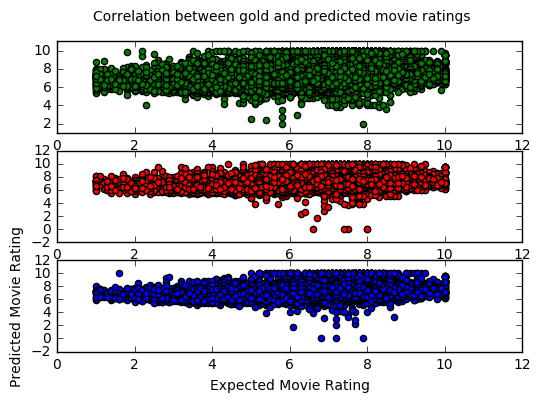

In [15]:
predicted_train_Y = best_model.predict(train_X)
predicted_train_Y = np.clip(predicted_train_Y,0,10)
train_gold_Y = df_train_Y.values

predicted_validation_Y = best_model.predict(validation_X)
predicted_validation_Y = np.clip(predicted_validation_Y,0,10)
validation_gold_Y = df_validation_Y.values

predicted_test_Y = best_model.predict(test_X)
predicted_test_Y = np.clip(predicted_test_Y,0,10)
test_gold_Y = df_test_Y.values

fig, axs = plt.subplots(3)
fig.suptitle('Correlation between gold and predicted movie ratings')

axs[0].scatter(train_gold_Y, predicted_train_Y, c="g")

plt.ylabel('Predicted Movie Rating')

axs[1].scatter(validation_gold_Y, predicted_validation_Y, c="r")
plt.ylabel('Predicted Movie Rating')


axs[2].scatter(test_gold_Y, predicted_test_Y, c="b")
plt.ylabel('Predicted Movie Rating')
plt.xlabel('Expected Movie Rating')
plt.show()

In [16]:
#save the model
model_filename = 'imdb_rating_model.pkl'
model_filename_output = open(model_filename, 'wb')
pickle.dump(best_model, model_filename_output)